# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS
Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
•	Text: The content of the blog post. Column name: Data
•	Category: The category to which the blog post belongs. Column name: Labels
### Tasks
1. Data Exploration and Preprocessing
+ Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
+ Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
+ Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
+ Split the data into training and test sets.
+ Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
+ Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
+ Choose a suitable library or method for performing sentiment analysis on the blog post texts.
+ Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
+ Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
+ Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
+ Discuss the performance of the model and any challenges encountered during the classification process.
+ Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

###### Submission Guidelines
•	Your submission should include a comprehensive report and the complete codebase.
•	Your code should be well-documented and include comments explaining the major steps.
###### Evaluation Criteria
•	Correct implementation of data preprocessing and feature extraction.
•	Accuracy and robustness of the Naive Bayes classification model.
•	Depth and insightfulness of the sentiment analysis.
•	Clarity and thoroughness of the evaluation and discussion sections.
•	Overall quality and organization of the report and code.
Good luck, and we look forward to your insightful analysis of the blog posts dataset!




### 1. Data Exploration and Preprocessing
+ Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
+ Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
+ Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

###### Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

In [1]:
import pandas as pd
import re
# Loading dataset
data = pd.read_csv("blogs.csv",encoding = "latin1")

In [2]:
# Displaying the dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [3]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
# Checking for missing values
data.isnull().sum()

Data      0
Labels    0
dtype: int64

###### Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [5]:
# Defining fuction to delete the
def clean(Data):
    Data = Data.lower()
    Data = re.sub('[^A-Za-z]',' ',Data)
    return Data

In [6]:
# Removing the Punctuations, numbers, special characters from text
data['Data'] = data['Data'].apply(clean)
data['Data']

0       path  cantaloupe srv cs cmu edu magnesium club...
1       newsgroups  alt atheism path  cantaloupe srv c...
2       path  cantaloupe srv cs cmu edu das news harva...
3       path  cantaloupe srv cs cmu edu magnesium club...
4       xref  cantaloupe srv cs cmu edu alt atheism   ...
                              ...                        
1995    xref  cantaloupe srv cs cmu edu talk abortion ...
1996    xref  cantaloupe srv cs cmu edu talk religion ...
1997    xref  cantaloupe srv cs cmu edu talk origins  ...
1998    xref  cantaloupe srv cs cmu edu talk religion ...
1999    xref  cantaloupe srv cs cmu edu sci skeptic   ...
Name: Data, Length: 2000, dtype: object

In [7]:
# Removing the stopwords like 'the','is','and' from text.
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [8]:
# Defining a fuction for removal of stopwords.
def remove_stop(x):
    word_list = x.split()
    clean_list = [w for w in word_list if not w in stop]
    clean_txt = ' '.join(clean_list)
    return clean_txt

In [9]:
data['Data'] = data['Data'].apply(remove_stop)

In [10]:
data.head()

,Data,Labels
0,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
1,newsgroups alt atheism path cantaloupe srv cs ...,alt.atheism
2,path cantaloupe srv cs cmu edu das news harvar...,alt.atheism
3,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
4,xref cantaloupe srv cs cmu edu alt atheism tal...,alt.atheism


In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Defining a fuction to tolenize the data i.e its the process of breaking text into smaller units
def tokenize_text(x):
    if isinstance(x, str):  # Process only if it's a string
        return word_tokenize(x)
    else:
        return []  # Return an empty list for non-string values

data['Data'] = data['Data'].apply(tokenize_text)


In [12]:
data.head(2)

,Data,Labels
0,"[path, cantaloupe, srv, cs, cmu, edu, magnesiu...",alt.atheism
1,"[newsgroups, alt, atheism, path, cantaloupe, s...",alt.atheism


###### Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [13]:
# Extracting feature by using TfidfVectorizer technique
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting tokenized data back to strings for TF-IDF
data['Data'] = data['Data'].apply(lambda x: ' '.join(x))


In [14]:
from sklearn.model_selection import train_test_split
# Splitting dataset into training and testing sets
blog_train,blog_test = train_test_split(data,test_size=0.3)

In [15]:
# TF-IDF Vectorization

tfidf = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf.fit_transform(blog_train['Data'])
X_test_tfidf = tfidf.transform(blog_test['Data'])

In [16]:
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 68518 stored elements and shape (600, 5000)>

### 2. Naive Bayes Model for Text Classification
+ Split the data into training and test sets.
+ Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
+ Train the model on the training set and make predictions on the test set.

###### Split the data into training and test sets.
The dataset is already been split into a ratio of 70,30 for extracting the features.

###### Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

In [17]:
from sklearn.naive_bayes import MultinomialNB

# Initializing a Naive Bayes classifier
nb_classifier = MultinomialNB()

###### Train the model on the training set and make predictions on the test set.

In [18]:
# Now train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, blog_train['Labels'])

# Making predictions
y_pred = nb_classifier.predict(X_test_tfidf)


### 3. Sentiment Analysis
+ Choose a suitable library or method for performing sentiment analysis on the blog post texts.
+ Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
+ Examine the distribution of sentiments across different categories and summarize your findings.

###### Choose a suitable library or method for performing sentiment analysis on the blog post texts.

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

#  VADER sentiment analyzer method is used to perform sentiment analysis
sia = SentimentIntensityAnalyzer()

# Defining the function to get sentiment scores
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [20]:
data['Sentiment'] = data['Data'].apply(get_sentiment)

In [21]:
data[['Data', 'Sentiment']].head()

,Data,Sentiment
0,path cantaloupe srv cs cmu edu magnesium club ...,Negative
1,newsgroups alt atheism path cantaloupe srv cs ...,Positive
2,path cantaloupe srv cs cmu edu das news harvar...,Negative
3,path cantaloupe srv cs cmu edu magnesium club ...,Negative
4,xref cantaloupe srv cs cmu edu alt atheism tal...,Positive


###### Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the categories of sentiment.
sentiment_counts = data['Sentiment'].value_counts()

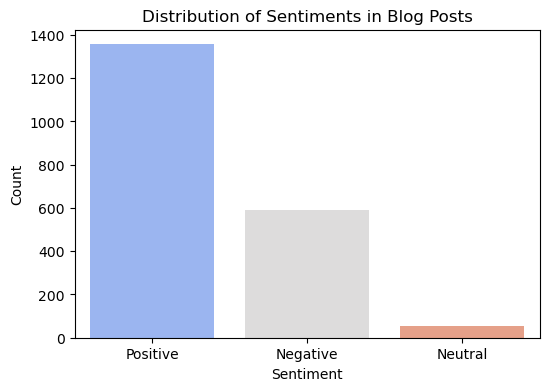

In [23]:
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Distribution of Sentiments in Blog Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


###### Examine the distribution of sentiments across different categories and summarize your findings.

In [24]:
# Group by blog category and sentiment
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack()
sentiment_distribution

Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,46.0,1.0,53.0
comp.graphics,13.0,1.0,86.0
comp.os.ms-windows.misc,19.0,4.0,77.0
comp.sys.ibm.pc.hardware,25.0,4.0,71.0
comp.sys.mac.hardware,17.0,1.0,82.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,7.0,11.0,82.0
rec.autos,32.0,2.0,66.0
rec.motorcycles,30.0,2.0,68.0


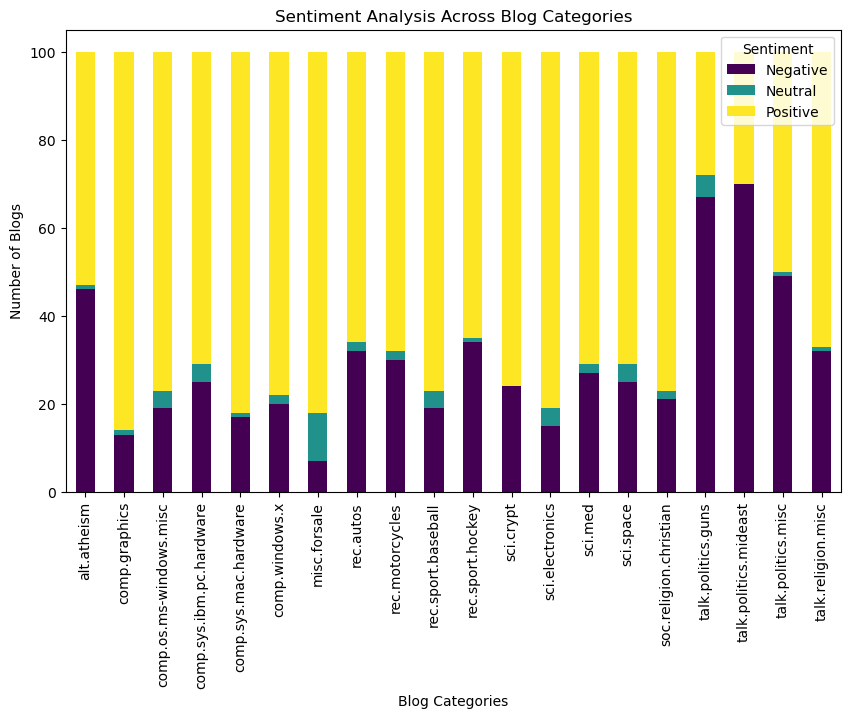

In [25]:
# Visualizing sentiment distribution per category
sentiment_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sentiment Analysis Across Blog Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Number of Blogs")
plt.legend(title="Sentiment")
plt.show()

### 4. Evaluation
+ Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
+ Discuss the performance of the model and any challenges encountered during the classification process.
+ Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

###### Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# accuracy
print("Accuracy:", accuracy_score(blog_test['Labels'], y_pred))

Accuracy: 0.7716666666666666


In [27]:
# Print classification report
print(classification_report(blog_test['Labels'], y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.68      0.74        31
           comp.graphics       0.79      0.66      0.72        29
 comp.os.ms-windows.misc       0.85      0.91      0.88        32
comp.sys.ibm.pc.hardware       0.43      0.92      0.59        25
   comp.sys.mac.hardware       0.88      0.70      0.78        33
          comp.windows.x       0.69      0.69      0.69        26
            misc.forsale       0.90      0.82      0.86        33
               rec.autos       1.00      0.77      0.87        35
         rec.motorcycles       0.87      0.79      0.83        33
      rec.sport.baseball       0.59      1.00      0.75        22
        rec.sport.hockey       0.89      0.86      0.87        28
               sci.crypt       0.96      0.84      0.90        31
         sci.electronics       1.00      0.28      0.44        39
                 sci.med       0.91      0.60      0.72        35
         

###### Discuss the performance of the model and any challenges encountered during the classification process.
The Naive Bayes classifier achieved 77% accuracy, performing well in some categories but struggling with class imbalance and overlapping content. Misclassification was notable in sci.electronics, likely due to similar terms across topics. Improving performance could involve hyperparameter tuning, better text features, or advanced models like LSTMs or transformers.

###### Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
The results show that comp.graphics, misc.forsale have more positive sentiment, while political and religious discussions tend to be negative due to their controversial nature. This highlights content biases and suggests improvements in sentiment detection for nuanced text like sarcasm or debates.